<a href="https://colab.research.google.com/github/jieunlee-hi/PYTHON/blob/main/naver_finance_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import auth
auth.authenticate_user()
from google.colab import drive
drive.mount('./drive')


Mounted at ./drive


In [2]:
#네이버금융 업종별 (ROE/PER/PBR) 데이터를 활용한 저평가종목 분석(2022.03 분기 기준)
#PER 작은값 /PBR 작은값/ROE 높은값 일수록 저평가된종목일 확률이 높다.
#66개종목 AVG=동일업종PER평균
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/naver_finance.csv',encoding='cp949')
df.head(20)

,업종명,소속종목수,소속종목명,ROE,PER,PBR,AVG,url
0,우주항공과국방,16,한화에어로스페이스,7.33,12.51,0.89,31.28,https://finance.naver.com/item/main.naver?code...
1,우주항공과국방,16,LIG넥스원,17.50,13.47,2.18,31.28,https://finance.naver.com/item/main.naver?code...
2,우주항공과국방,16,한국항공우주,7.14,56.01,3.85,31.28,https://finance.naver.com/item/main.naver?code...
3,우주항공과국방,16,한화시스템,5.38,26.73,1.15,31.28,https://finance.naver.com/item/main.naver?code...
4,우주항공과국방,16,제노코,20.25,28.00,5.28,31.28,https://finance.naver.com/item/main.naver?code...
5,우주항공과국방,16,휴니드,7.11,11.90,0.76,31.28,https://finance.naver.com/item/main.naver?code...
6,우주항공과국방,16,빅텍,9.68,29.37,2.73,31.28,https://finance.naver.com/item/main.naver?code...
7,우주항공과국방,16,퍼스텍,6.65,58.58,3.98,31.28,https://finance.naver.com/item/main.naver?code...
8,우주항공과국방,16,쎄트렉아이,-11.52,-27.34,2.53,31.28,https://finance.naver.com/item/main.naver?code...
9,우주항공과국방,16,하이즈항공,-26.43,-4.16,1.21,31.28,https://finance.naver.com/item/main.naver?code...


In [3]:
#EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2432 entries, 0 to 2431
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   업종명     2432 non-null   object 
 1   소속종목수   2432 non-null   int64  
 2   소속종목명   2432 non-null   object 
 3   ROE     2240 non-null   float64
 4   PER     2416 non-null   float64
 5   PBR     2425 non-null   float64
 6   AVG     2432 non-null   float64
 7   url     2432 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 152.1+ KB


In [4]:
df.describe()

,소속종목수,ROE,PER,PBR,AVG
count,2432.000000,2240.000000,2416.000000,2425.000000,2432.000000
mean,72.157895,-1.509027,20.854768,2.453159,24.713252
std,44.085476,224.409289,605.736996,23.654371,31.045197
min,2.000000,-8992.570000,-2645.000000,-11.580000,0.320000
25%,34.000000,-1.807500,-4.085000,0.680000,8.470000
50%,69.000000,5.600000,7.645000,1.210000,15.530000
75%,93.000000,12.780000,18.122500,2.190000,26.100000
max,158.000000,4446.170000,27500.000000,1158.000000,575.000000


In [5]:
#중복된데이터확인
df[df.duplicated()]

,업종명,소속종목수,소속종목명,ROE,PER,PBR,AVG,url


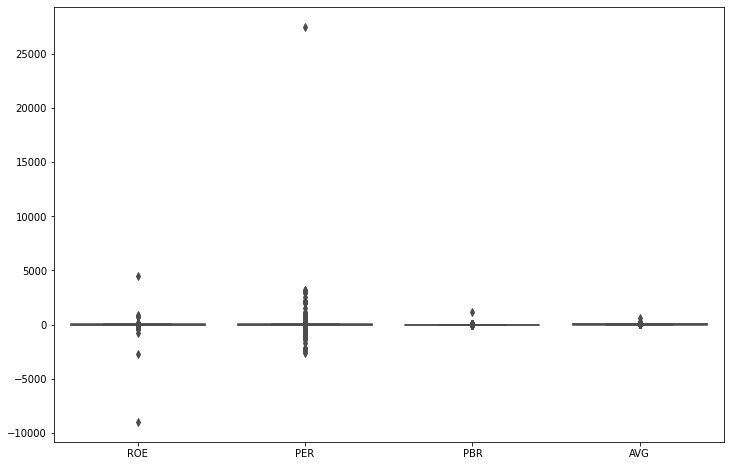

In [6]:
#이상치 존재 유무 시각화
plt.figure(figsize=(12,8))
sns.boxplot(data=df[['ROE','PER','PBR','AVG']],color='red',notch=True)
plt.show()

In [7]:
#결측값 여부 확인
df.isnull()
#네이버금융사이트 내에 데이터값이 없는 경우 결측값 발생
df.isnull().sum()

업종명        0
소속종목수      0
소속종목명      0
ROE      192
PER       16
PBR        7
AVG        0
url        0
dtype: int64

In [8]:
#결측값이 들어있는 행 전체 삭제
df=df.dropna(axis=0)

In [9]:
#결측값 여부 확인
df.isnull()
#네이버금융사이트 내에 데이터값이 없는 경우 결측값 발생
df.isnull().sum()

업종명      0
소속종목수    0
소속종목명    0
ROE      0
PER      0
PBR      0
AVG      0
url      0
dtype: int64

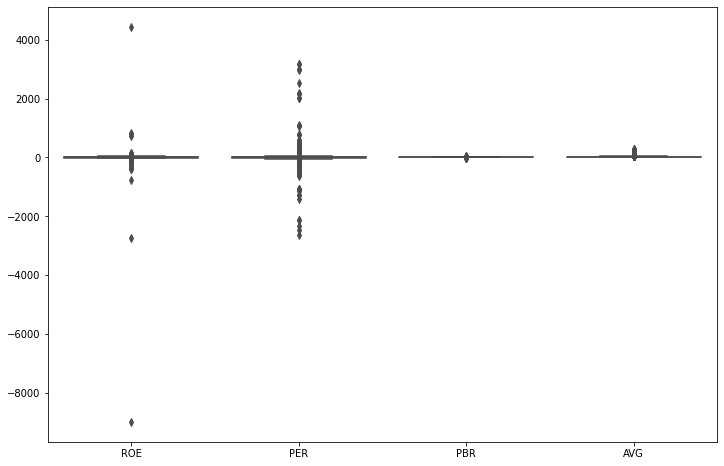

In [12]:
#결측치 삭제 후 이상치 존재 유무 시각화
plt.figure(figsize=(12,8))
sns.boxplot(data=df[['ROE','PER','PBR','AVG']],color='red',notch=True)
plt.show()

In [13]:
#이상치값 IQR 구하기
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
Q1 - 1.5 * IQR, Q3 + 1.5 * IQR


(소속종목수   -54.5000
 ROE     -23.7725
 PER     -34.8375
 PBR      -1.4825
 AVG     -17.9750
 dtype: float64, 소속종목수    181.5000
 ROE       34.7275
 PER       49.6225
 PBR        4.2175
 AVG       52.5450
 dtype: float64)

이상치검출

In [14]:
# ROE_Q3 = df.quantile(0.75) # df['ROE'].quantile(0.75) 처럼 특정 열만 적용 가능
# ROE_Q1 = df.quantile(0.25)

# ROE_IQR = ROE_Q3 - ROE_Q1
# 'ROE' 열에 대하여 이상치 여부를 판별해주는 함수
def is_ROE_outlier(df):
  roe_score = df['ROE']
  if roe_score > Q3['ROE'] + 1.5 * IQR['ROE'] or roe_score < Q1['ROE'] - 1.5 * IQR['ROE']:
      return True
  else:
      return False


# apply 함수를 통하여 각 값의 이상치 여부를 찾고 새로운 열에 결과 저장
df['ROE_IQR'] = df.apply(is_ROE_outlier, axis = 1) # axis = 1 지정 필수



,업종명,소속종목수,소속종목명,ROE,PER,PBR,AVG,url,ROE_IQR
0,우주항공과국방,16,한화에어로스페이스,7.33,12.51,0.89,31.28,https://finance.naver.com/item/main.naver?code...,False
1,우주항공과국방,16,LIG넥스원,17.50,13.47,2.18,31.28,https://finance.naver.com/item/main.naver?code...,False
2,우주항공과국방,16,한국항공우주,7.14,56.01,3.85,31.28,https://finance.naver.com/item/main.naver?code...,False
3,우주항공과국방,16,한화시스템,5.38,26.73,1.15,31.28,https://finance.naver.com/item/main.naver?code...,False
4,우주항공과국방,16,제노코,20.25,28.00,5.28,31.28,https://finance.naver.com/item/main.naver?code...,False
...,...,...,...,...,...,...,...,...,...
2427,석유와가스,20,SK이노베이션,9.01,11.34,0.82,7.11,https://finance.naver.com/item/main.naver?code...,False
2428,석유와가스,20,중앙에너비스,0.90,235.47,1.53,7.11,https://finance.naver.com/item/main.naver?code...,False
2429,석유와가스,20,세원이앤씨,-4.96,-14.56,0.75,7.11,https://finance.naver.com/item/main.naver?code...,False
2430,석유와가스,20,S-Oil,28.09,5.53,1.40,7.11,https://finance.naver.com/item/main.naver?code...,False


In [15]:
df.head(100)

,업종명,소속종목수,소속종목명,ROE,PER,PBR,AVG,url,ROE_IQR
0,우주항공과국방,16,한화에어로스페이스,7.33,12.51,0.89,31.28,https://finance.naver.com/item/main.naver?code...,False
1,우주항공과국방,16,LIG넥스원,17.50,13.47,2.18,31.28,https://finance.naver.com/item/main.naver?code...,False
2,우주항공과국방,16,한국항공우주,7.14,56.01,3.85,31.28,https://finance.naver.com/item/main.naver?code...,False
3,우주항공과국방,16,한화시스템,5.38,26.73,1.15,31.28,https://finance.naver.com/item/main.naver?code...,False
4,우주항공과국방,16,제노코,20.25,28.00,5.28,31.28,https://finance.naver.com/item/main.naver?code...,False
...,...,...,...,...,...,...,...,...,...
100,기계,93,대동기어,6.07,16.74,0.99,17.37,https://finance.naver.com/item/main.naver?code...,False
101,기계,93,에스피시스템스,-3.94,-72.11,2.63,17.37,https://finance.naver.com/item/main.naver?code...,False
102,기계,93,테라사이언스,-5.67,-45.62,3.79,17.37,https://finance.naver.com/item/main.naver?code...,False
103,기계,93,스맥,-17.67,-6.06,1.08,17.37,https://finance.naver.com/item/main.naver?code...,False


In [16]:
# PER_Q3 = df.quantile(0.75) # df['ROE'].quantile(0.75) 처럼 특정 열만 적용 가능
# PER_Q1 = df.quantile(0.25)

# PER_IQR = PER_Q3 - PER_Q1

# 'PER' 열에 대하여 이상치 여부를 판별해주는 함수
def is_PER_outlier(df):
  per_score = df['PER']
  if per_score > Q3['PER'] + 1.5 * IQR['PER'] or per_score < Q1['PER'] - 1.5 * IQR['PER']:
      return True
  else:
      return False

df['PER_IQR'] = df.apply(is_PER_outlier, axis = 1) # axis = 1 지정 필수
df


,업종명,소속종목수,소속종목명,ROE,PER,PBR,AVG,url,ROE_IQR,PER_IQR
0,우주항공과국방,16,한화에어로스페이스,7.33,12.51,0.89,31.28,https://finance.naver.com/item/main.naver?code...,False,False
1,우주항공과국방,16,LIG넥스원,17.50,13.47,2.18,31.28,https://finance.naver.com/item/main.naver?code...,False,False
2,우주항공과국방,16,한국항공우주,7.14,56.01,3.85,31.28,https://finance.naver.com/item/main.naver?code...,False,True
3,우주항공과국방,16,한화시스템,5.38,26.73,1.15,31.28,https://finance.naver.com/item/main.naver?code...,False,False
4,우주항공과국방,16,제노코,20.25,28.00,5.28,31.28,https://finance.naver.com/item/main.naver?code...,False,False
...,...,...,...,...,...,...,...,...,...,...
2427,석유와가스,20,SK이노베이션,9.01,11.34,0.82,7.11,https://finance.naver.com/item/main.naver?code...,False,False
2428,석유와가스,20,중앙에너비스,0.90,235.47,1.53,7.11,https://finance.naver.com/item/main.naver?code...,False,True
2429,석유와가스,20,세원이앤씨,-4.96,-14.56,0.75,7.11,https://finance.naver.com/item/main.naver?code...,False,False
2430,석유와가스,20,S-Oil,28.09,5.53,1.40,7.11,https://finance.naver.com/item/main.naver?code...,False,False


In [17]:
# 'PBR' 열에 대하여 이상치 여부를 판별해주는 함수
def is_PBR_outlier(df):
  pbr_score = df['PBR']
  if pbr_score > Q3['PBR'] + 1.5 * IQR['PBR'] or pbr_score < Q1['PBR'] - 1.5 * IQR['PBR']:
      return True
  else:
      return False
df['PBR_IQR'] = df.apply(is_PBR_outlier, axis = 1) # axis = 1 지정 필수
df


,업종명,소속종목수,소속종목명,ROE,PER,PBR,AVG,url,ROE_IQR,PER_IQR,PBR_IQR
0,우주항공과국방,16,한화에어로스페이스,7.33,12.51,0.89,31.28,https://finance.naver.com/item/main.naver?code...,False,False,False
1,우주항공과국방,16,LIG넥스원,17.50,13.47,2.18,31.28,https://finance.naver.com/item/main.naver?code...,False,False,False
2,우주항공과국방,16,한국항공우주,7.14,56.01,3.85,31.28,https://finance.naver.com/item/main.naver?code...,False,True,False
3,우주항공과국방,16,한화시스템,5.38,26.73,1.15,31.28,https://finance.naver.com/item/main.naver?code...,False,False,False
4,우주항공과국방,16,제노코,20.25,28.00,5.28,31.28,https://finance.naver.com/item/main.naver?code...,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
2427,석유와가스,20,SK이노베이션,9.01,11.34,0.82,7.11,https://finance.naver.com/item/main.naver?code...,False,False,False
2428,석유와가스,20,중앙에너비스,0.90,235.47,1.53,7.11,https://finance.naver.com/item/main.naver?code...,False,True,False
2429,석유와가스,20,세원이앤씨,-4.96,-14.56,0.75,7.11,https://finance.naver.com/item/main.naver?code...,False,False,False
2430,석유와가스,20,S-Oil,28.09,5.53,1.40,7.11,https://finance.naver.com/item/main.naver?code...,False,False,False


In [18]:
# 'AVG' 열에 대하여 이상치 여부를 판별해주는 함수
def is_AVG_outlier(df):
  avg_score = df['AVG']
  if avg_score > Q3['AVG'] + 1.5 * IQR['AVG'] or avg_score < Q1['AVG'] - 1.5 * IQR['AVG']:
      return True
  else:
      return False

df['AVG_IQR'] = df.apply(is_AVG_outlier, axis = 1) # axis = 1 지정 필수
df

,업종명,소속종목수,소속종목명,ROE,PER,PBR,AVG,url,ROE_IQR,PER_IQR,PBR_IQR,AVG_IQR
0,우주항공과국방,16,한화에어로스페이스,7.33,12.51,0.89,31.28,https://finance.naver.com/item/main.naver?code...,False,False,False,False
1,우주항공과국방,16,LIG넥스원,17.50,13.47,2.18,31.28,https://finance.naver.com/item/main.naver?code...,False,False,False,False
2,우주항공과국방,16,한국항공우주,7.14,56.01,3.85,31.28,https://finance.naver.com/item/main.naver?code...,False,True,False,False
3,우주항공과국방,16,한화시스템,5.38,26.73,1.15,31.28,https://finance.naver.com/item/main.naver?code...,False,False,False,False
4,우주항공과국방,16,제노코,20.25,28.00,5.28,31.28,https://finance.naver.com/item/main.naver?code...,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2427,석유와가스,20,SK이노베이션,9.01,11.34,0.82,7.11,https://finance.naver.com/item/main.naver?code...,False,False,False,False
2428,석유와가스,20,중앙에너비스,0.90,235.47,1.53,7.11,https://finance.naver.com/item/main.naver?code...,False,True,False,False
2429,석유와가스,20,세원이앤씨,-4.96,-14.56,0.75,7.11,https://finance.naver.com/item/main.naver?code...,False,False,False,False
2430,석유와가스,20,S-Oil,28.09,5.53,1.40,7.11,https://finance.naver.com/item/main.naver?code...,False,False,False,False


In [19]:
# ROE값이 이상치인 행은 제거하여 필터링
df = df.loc[df['ROE_IQR'] == False]
# 이상치여부를 나타내는 열 제거
del df['ROE_IQR']

df

,업종명,소속종목수,소속종목명,ROE,PER,PBR,AVG,url,PER_IQR,PBR_IQR,AVG_IQR
0,우주항공과국방,16,한화에어로스페이스,7.33,12.51,0.89,31.28,https://finance.naver.com/item/main.naver?code...,False,False,False
1,우주항공과국방,16,LIG넥스원,17.50,13.47,2.18,31.28,https://finance.naver.com/item/main.naver?code...,False,False,False
2,우주항공과국방,16,한국항공우주,7.14,56.01,3.85,31.28,https://finance.naver.com/item/main.naver?code...,True,False,False
3,우주항공과국방,16,한화시스템,5.38,26.73,1.15,31.28,https://finance.naver.com/item/main.naver?code...,False,False,False
4,우주항공과국방,16,제노코,20.25,28.00,5.28,31.28,https://finance.naver.com/item/main.naver?code...,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
2427,석유와가스,20,SK이노베이션,9.01,11.34,0.82,7.11,https://finance.naver.com/item/main.naver?code...,False,False,False
2428,석유와가스,20,중앙에너비스,0.90,235.47,1.53,7.11,https://finance.naver.com/item/main.naver?code...,True,False,False
2429,석유와가스,20,세원이앤씨,-4.96,-14.56,0.75,7.11,https://finance.naver.com/item/main.naver?code...,False,False,False
2430,석유와가스,20,S-Oil,28.09,5.53,1.40,7.11,https://finance.naver.com/item/main.naver?code...,False,False,False


In [20]:
# PER 값이 이상치인 행은 제거하여 필터링
df = df.loc[df['PER_IQR'] == False]
# 이상치여부를 나타내는 열 제거
del df['PER_IQR']

df

,업종명,소속종목수,소속종목명,ROE,PER,PBR,AVG,url,PBR_IQR,AVG_IQR
0,우주항공과국방,16,한화에어로스페이스,7.33,12.51,0.89,31.28,https://finance.naver.com/item/main.naver?code...,False,False
1,우주항공과국방,16,LIG넥스원,17.50,13.47,2.18,31.28,https://finance.naver.com/item/main.naver?code...,False,False
3,우주항공과국방,16,한화시스템,5.38,26.73,1.15,31.28,https://finance.naver.com/item/main.naver?code...,False,False
4,우주항공과국방,16,제노코,20.25,28.00,5.28,31.28,https://finance.naver.com/item/main.naver?code...,True,False
5,우주항공과국방,16,휴니드,7.11,11.90,0.76,31.28,https://finance.naver.com/item/main.naver?code...,False,False
...,...,...,...,...,...,...,...,...,...,...
2426,석유와가스,20,에스아이리소스,25.23,11.75,2.54,7.11,https://finance.naver.com/item/main.naver?code...,False,False
2427,석유와가스,20,SK이노베이션,9.01,11.34,0.82,7.11,https://finance.naver.com/item/main.naver?code...,False,False
2429,석유와가스,20,세원이앤씨,-4.96,-14.56,0.75,7.11,https://finance.naver.com/item/main.naver?code...,False,False
2430,석유와가스,20,S-Oil,28.09,5.53,1.40,7.11,https://finance.naver.com/item/main.naver?code...,False,False


In [21]:
# PBR값이 이상치인 행은 제거하여 필터링
df = df.loc[df['PBR_IQR'] == False]
# 이상치여부를 나타내는 열 제거
del df['PBR_IQR']

df

,업종명,소속종목수,소속종목명,ROE,PER,PBR,AVG,url,AVG_IQR
0,우주항공과국방,16,한화에어로스페이스,7.33,12.51,0.89,31.28,https://finance.naver.com/item/main.naver?code...,False
1,우주항공과국방,16,LIG넥스원,17.50,13.47,2.18,31.28,https://finance.naver.com/item/main.naver?code...,False
3,우주항공과국방,16,한화시스템,5.38,26.73,1.15,31.28,https://finance.naver.com/item/main.naver?code...,False
5,우주항공과국방,16,휴니드,7.11,11.90,0.76,31.28,https://finance.naver.com/item/main.naver?code...,False
6,우주항공과국방,16,빅텍,9.68,29.37,2.73,31.28,https://finance.naver.com/item/main.naver?code...,False
...,...,...,...,...,...,...,...,...,...
2426,석유와가스,20,에스아이리소스,25.23,11.75,2.54,7.11,https://finance.naver.com/item/main.naver?code...,False
2427,석유와가스,20,SK이노베이션,9.01,11.34,0.82,7.11,https://finance.naver.com/item/main.naver?code...,False
2429,석유와가스,20,세원이앤씨,-4.96,-14.56,0.75,7.11,https://finance.naver.com/item/main.naver?code...,False
2430,석유와가스,20,S-Oil,28.09,5.53,1.40,7.11,https://finance.naver.com/item/main.naver?code...,False


In [22]:
#AVG값이 이상치인 행은 제거하여 필터링
df = df.loc[df['AVG_IQR'] == False]
# 이상치여부를 나타내는 열 제거
del df['AVG_IQR']

df

,업종명,소속종목수,소속종목명,ROE,PER,PBR,AVG,url
0,우주항공과국방,16,한화에어로스페이스,7.33,12.51,0.89,31.28,https://finance.naver.com/item/main.naver?code...
1,우주항공과국방,16,LIG넥스원,17.50,13.47,2.18,31.28,https://finance.naver.com/item/main.naver?code...
3,우주항공과국방,16,한화시스템,5.38,26.73,1.15,31.28,https://finance.naver.com/item/main.naver?code...
5,우주항공과국방,16,휴니드,7.11,11.90,0.76,31.28,https://finance.naver.com/item/main.naver?code...
6,우주항공과국방,16,빅텍,9.68,29.37,2.73,31.28,https://finance.naver.com/item/main.naver?code...
...,...,...,...,...,...,...,...,...
2426,석유와가스,20,에스아이리소스,25.23,11.75,2.54,7.11,https://finance.naver.com/item/main.naver?code...
2427,석유와가스,20,SK이노베이션,9.01,11.34,0.82,7.11,https://finance.naver.com/item/main.naver?code...
2429,석유와가스,20,세원이앤씨,-4.96,-14.56,0.75,7.11,https://finance.naver.com/item/main.naver?code...
2430,석유와가스,20,S-Oil,28.09,5.53,1.40,7.11,https://finance.naver.com/item/main.naver?code...



#이상치 존재 유무 시각화

```



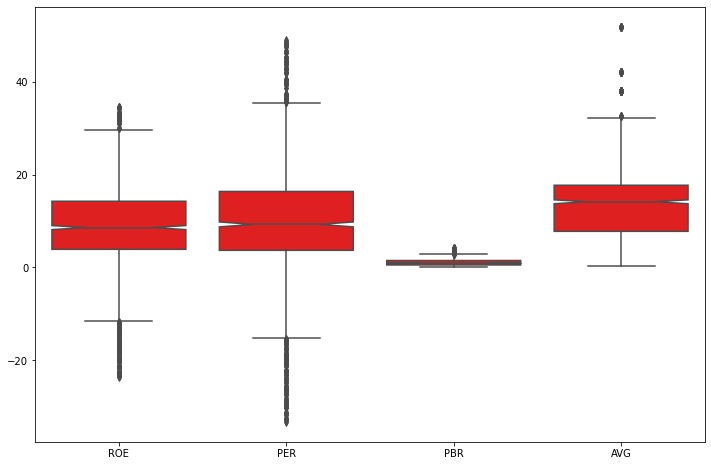

In [56]:
#결측치/이상치를 모두 제거 한 후 시각화
plt.figure(figsize=(12,8))
sns.boxplot(data=df[['ROE','PER','PBR','AVG']],color='red',notch=True)
plt.show()

In [32]:
df.describe()

,소속종목수,ROE,PER,PBR,AVG
count,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000
mean,67.356638,7.982881,9.123058,1.130833,14.931871
std,40.736323,10.871249,13.947535,0.794498,9.618971
min,5.000000,-23.660000,-33.290000,0.090000,0.320000
25%,28.000000,3.897500,3.680000,0.530000,7.770000
50%,69.000000,8.580000,9.265000,0.900000,14.140000
75%,92.000000,14.252500,16.360000,1.492500,17.700000
max,158.000000,34.650000,48.920000,4.210000,51.840000


**데이터프레임** 순서 정렬하기


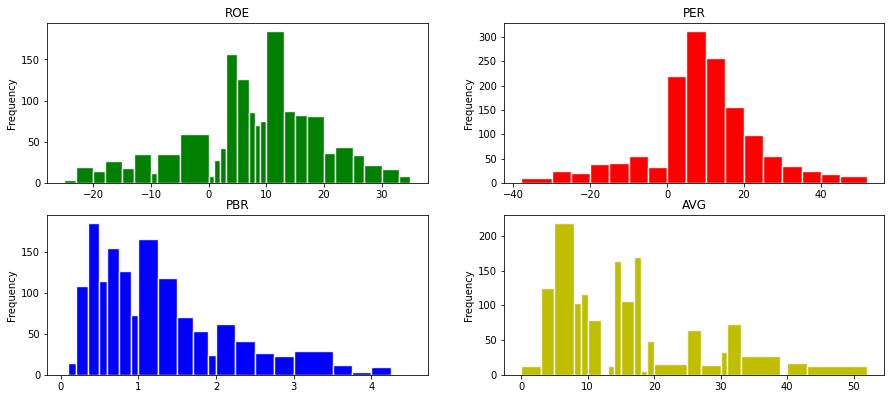

In [46]:
#데이터 값 분포 시각화
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,10))

for i, col in enumerate(df):
    if 3 <= i <= 6:
        ax = fig.add_subplot(3, 2, i)
        ax.title.set_text(col)

        if col == "PER":
            df[col].plot.hist(bins=[-38,-30,-25,-20,-15,-10,-5,0,5,10,15,20,25,30,35,40,45,52],color='r',edgecolor = 'whitesmoke',linewidth = 1.4)
        elif col == "PBR":
            df[col].plot.hist(bins=[0.05,0.075,0.1,0.2,0.35,0.5,0.6,0.75,0.9,1,1.25,1.5,1.7,1.9,2.0,2.25,2.5,2.75,3,3.5,3.75,4,4.25,4.5],color='b',edgecolor = 'whitesmoke',linewidth = 1.4)
        elif col == "ROE":
            df[col].plot.hist(bins=[-25,-23,-20,-18,-15,-13,-10,-9,-5,0,1,2,3,5,7,8,9,10,13,15,17,20,22,25,27,30,33,35],color='g',edgecolor = 'whitesmoke',linewidth = 1.4)
        elif col == "AVG":
            df[col].plot.hist(bins=[0,3,5,8,9,10,12,13,14,15,17,18,19,20,25,27,30,31,33,39,40,43,52],color='y',edgecolor = 'whitesmoke',linewidth = 1.4)

plt.show()


In [29]:
#PER 낮을수록 좋음
# per 오름차순 (NaN 제외/ 마이너스부호포함(음수포함))
per_ascending = df.sort_values(by="PER", ascending=True)
per_ascending[(per_ascending["PER"] != None)].head(20)


,업종명,소속종목수,소속종목명,ROE,PER,PBR,AVG,url
1303,조선,25,STX중공업,-2.23,-33.29,0.78,5.61,https://finance.naver.com/item/main.naver?code...
1953,창업투자,80,큐캐피탈,-2.30,-32.88,0.73,3.79,https://finance.naver.com/item/main.naver?code...
631,자동차부품,141,삼기,-2.99,-32.74,0.90,14.14,https://finance.naver.com/item/main.naver?code...
751,자동차부품,141,센트랄모텍,-4.42,-32.50,1.54,14.14,https://finance.naver.com/item/main.naver?code...
497,건설,73,이화공영,-8.83,-31.84,2.69,6.54,https://finance.naver.com/item/main.naver?code...
235,방송과엔터테인먼트,56,에프엔씨엔터,-4.98,-31.58,1.52,37.89,https://finance.naver.com/item/main.naver?code...
1724,철강,53,동양철관,-4.63,-31.32,1.49,3.02,https://finance.naver.com/item/main.naver?code...
688,자동차부품,141,대원강업,-1.36,-31.19,0.43,14.14,https://finance.naver.com/item/main.naver?code...
2265,IT서비스,76,씨이랩,-10.94,-30.32,3.43,19.04,https://finance.naver.com/item/main.naver?code...
1686,소프트웨어,59,한컴MDS,-4.00,-30.10,1.15,32.07,https://finance.naver.com/item/main.naver?code...


In [59]:
#PBR 낮을수록좋음
# pbr 오름차순 (NaN 제외)
pbr_ascending = df.sort_values(by="PBR", ascending=True)
pbr_ascending.head(20)
#pbr_ascending[(pbr_ascending["PBR"] != None)].head(20)


,업종명,소속종목수,소속종목명,ROE,PER,PBR,AVG,url
397,레저용장비와제품,10,헝셩그룹,0.78,12.00,0.09,3.86,https://finance.naver.com/item/main.naver?code...
130,화장품,54,오가닉티코스메틱,-4.48,-2.10,0.11,30.97,https://finance.naver.com/item/main.naver?code...
1581,화학,114,GRT,5.46,2.53,0.13,9.26,https://finance.naver.com/item/main.naver?code...
482,건설,73,HDC,0.93,18.44,0.15,6.54,https://finance.naver.com/item/main.naver?code...
1571,화학,114,대한화섬,4.02,5.06,0.16,9.26,https://finance.naver.com/item/main.naver?code...
995,생명보험,7,한화생명,8.79,2.07,0.17,6.73,https://finance.naver.com/item/main.naver?code...
1092,"섬유,의류,신발,호화품",80,이스트아시아홀딩스,1.03,15.07,0.18,5.17,https://finance.naver.com/item/main.naver?code...
674,자동차부품,141,세원정공,1.90,9.48,0.18,14.14,https://finance.naver.com/item/main.naver?code...
711,자동차부품,141,넥센,0.70,26.50,0.18,14.14,https://finance.naver.com/item/main.naver?code...
2413,석유와가스,20,경동인베스트,4.33,4.53,0.18,7.11,https://finance.naver.com/item/main.naver?code...


In [57]:
#ROE 높을수록좋음.
# ROE 내림차순 (NaN 제외)
roe_ascending = df.sort_values(by="ROE", ascending=False)
roe_ascending.head(20)
#roe_ascending[(roe_ascending["ROE"] != None) & (roe_ascending["ROE"]>0)].head(20)


,업종명,소속종목수,소속종목명,ROE,PER,PBR,AVG,url
1874,디스플레이장비및부품,86,이녹스첨단소재,34.65,7.18,2.07,17.70,https://finance.naver.com/item/main.naver?code...
1719,철강,53,한국특강,34.60,3.09,0.89,3.02,https://finance.naver.com/item/main.naver?code...
2371,게임엔터테인먼트,34,카카오게임즈,34.51,7.24,1.96,17.72,https://finance.naver.com/item/main.naver?code...
60,기계,93,우진플라임,34.14,2.88,0.85,17.37,https://finance.naver.com/item/main.naver?code...
750,자동차부품,141,디아이씨,33.38,6.83,1.68,14.14,https://finance.naver.com/item/main.naver?code...
626,자동차부품,141,디젠스,33.31,7.37,2.11,14.14,https://finance.naver.com/item/main.naver?code...
2251,IT서비스,76,유엔젤,33.27,3.03,0.77,19.04,https://finance.naver.com/item/main.naver?code...
760,전자장비와기기,92,비에이치,33.19,7.65,1.99,16.22,https://finance.naver.com/item/main.naver?code...
395,레저용장비와제품,10,이녹스,33.15,3.66,0.99,3.86,https://finance.naver.com/item/main.naver?code...
2158,광고,13,이엠넷,32.98,4.91,1.39,14.36,https://finance.naver.com/item/main.naver?code...


In [72]:
df[(df['ROE'] >df['ROE'].mean()) & (df['PBR'] <df['PBR'].mean()) & (df['PER']<df['PER'].mean())]

,업종명,소속종목수,소속종목명,ROE,PER,PBR,AVG,url
33,기계,93,현대두산인프라코어,20.04,2.31,0.73,17.37,https://finance.naver.com/item/main.naver?code...
39,기계,93,대창단조,12.81,5.69,0.59,17.37,https://finance.naver.com/item/main.naver?code...
60,기계,93,우진플라임,34.14,2.88,0.85,17.37,https://finance.naver.com/item/main.naver?code...
61,기계,93,코메론,9.60,5.08,0.45,17.37,https://finance.naver.com/item/main.naver?code...
68,기계,93,흥국,11.87,8.64,0.91,17.37,https://finance.naver.com/item/main.naver?code...
...,...,...,...,...,...,...,...,...
2417,석유와가스,20,미창석유,11.75,4.09,0.40,7.11,https://finance.naver.com/item/main.naver?code...
2418,석유와가스,20,GS우,15.69,2.48,0.35,7.11,https://finance.naver.com/item/main.naver?code...
2419,석유와가스,20,SK디스커버리우,11.96,2.56,0.28,7.11,https://finance.naver.com/item/main.naver?code...
2420,석유와가스,20,SK디스커버리,11.96,2.56,0.28,7.11,https://finance.naver.com/item/main.naver?code...


In [73]:
df_s = df.sort_values(by=['ROE', 'PER','PBR'], ascending=[False, True,True]) 
df_s.head()

,업종명,소속종목수,소속종목명,ROE,PER,PBR,AVG,url
1874,디스플레이장비및부품,86,이녹스첨단소재,34.65,7.18,2.07,17.70,https://finance.naver.com/item/main.naver?code...
1719,철강,53,한국특강,34.60,3.09,0.89,3.02,https://finance.naver.com/item/main.naver?code...
2371,게임엔터테인먼트,34,카카오게임즈,34.51,7.24,1.96,17.72,https://finance.naver.com/item/main.naver?code...
60,기계,93,우진플라임,34.14,2.88,0.85,17.37,https://finance.naver.com/item/main.naver?code...
750,자동차부품,141,디아이씨,33.38,6.83,1.68,14.14,https://finance.naver.com/item/main.naver?code...


In [ ]:
#PER은 현재주식가격을 주당순이익으로 나눈값
#PER 시장평균
#PER 주가수익비율  = 주가 /주당순이익
#PER은 같은산업군에서 비교해야함.   *
#PBR : 주가순자산비율 (주가/주당순자산(총자산-총부채/발행주식수))
#PBR<1 저평가   *
#ROE 10%정도 이상을 많이 추천하는데, ROE 10%이상만되어도 우수한기업 20-30%일경우 굉장한성장  *
#ROE가높을수록 PBR도 높아진다
#PER이 낮을수록 기업의 수익성이좋고, PBR이 낮을수록 기업의 재무건전성이 좋다고 생각된다.
#통상적으로 PER은 10보다 낮을 때, PBR은 1모다 낮을때 저평가되어있다고 말한다. 하지만 기업의 수익성이나 자산은 업종별로 천차만별이기 때문에
#업종평균 PER과 PBR로 고려해야한다.
#http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201010107